100%|██████████| 170M/170M [00:10<00:00, 15.8MB/s]


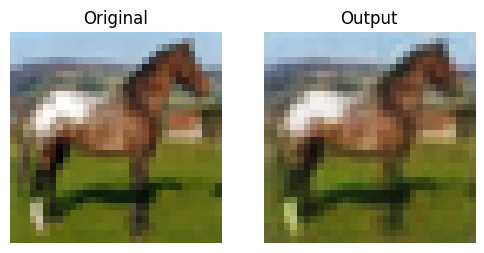

In [1]:
import torch, torchvision
import torch.nn as nn
import torchvision.transforms as T
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"

# Data
transform = T.Compose([T.ToTensor(), T.Normalize((0.5,)*3, (0.5,)*3)])
data = torchvision.datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)
loader = torch.utils.data.DataLoader(data, batch_size=64, shuffle=True)

# Model
model = nn.Sequential(
    nn.Conv2d(3,32,4,2,1), nn.ReLU(),
    nn.Conv2d(32,64,4,2,1), nn.ReLU(),
    nn.ConvTranspose2d(64,32,4,2,1), nn.ReLU(),
    nn.ConvTranspose2d(32,3,4,2,1), nn.Tanh()
).to(device)

loss_fn = nn.L1Loss()
opt = torch.optim.Adam(model.parameters(), lr=1e-3)

# Train (2 epochs only — faster)
for _ in range(2):
    for x,_ in loader:
        x = x.to(device)
        loss = loss_fn(model(x), x)
        opt.zero_grad(); loss.backward(); opt.step()

# Show result
x,_ = next(iter(loader))
x = x.to(device)
with torch.no_grad(): y = model(x)

def show(img):
    img = img*0.5+0.5
    plt.imshow(img.permute(1,2,0)); plt.axis("off")

plt.figure(figsize=(6,3))
plt.subplot(1,2,1); show(x[0].cpu()); plt.title("Original")
plt.subplot(1,2,2); show(y[0].cpu()); plt.title("Output")
plt.show()
